In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\covid_19_data.csv")  # or use any dataset like 'owid-covid-data.csv'
print("Dataset loaded successfully")

Dataset loaded successfully


In [37]:
df.head()


,date,location,total_cases,total_deaths
0,2020-03-01,CountryA,10.0,1.0
1,2020-03-02,CountryA,20.0,2.0
2,2020-03-01,CountryB,5.0,NaN
3,2020-03-02,CountryB,15.0,1.0
4,2020-03-03,CountryA,NaN,3.0


In [38]:
df.info()          # Data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          6 non-null      object 
 1   location      6 non-null      object 
 2   total_cases   5 non-null      float64
 3   total_deaths  5 non-null      float64
dtypes: float64(2), object(2)
memory usage: 324.0+ bytes


In [39]:
df.describe()      # Summary statistics


,total_cases,total_deaths
count,5.000000,5.00000
mean,15.000000,2.40000
std,7.905694,1.67332
min,5.000000,1.00000
25%,10.000000,1.00000
50%,15.000000,2.00000
75%,20.000000,3.00000
max,25.000000,5.00000


In [40]:
df.columns         # List of columns


Index(['date', 'location', 'total_cases', 'total_deaths'], dtype='object')

In [41]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent})
print(missing_summary.sort_values(by='Percentage', ascending=False))


              Missing Values  Percentage
total_deaths               1   16.666667
total_cases                1   16.666667
location                   0    0.000000
date                       0    0.000000


In [42]:
df.fillna(0, inplace=True)         # Replace missing values with 0
# or
df.dropna(inplace=True)            # Drop rows with any null value
print(df.isnull().sum())

date            0
location        0
total_cases     0
total_deaths    0
dtype: int64


In [43]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


In [44]:
print(df.columns.tolist())


['date', 'location', 'total_cases', 'total_deaths', 'year', 'month']


In [45]:
pivot_cases = pd.pivot_table(df, values='total_cases',
                             index='date',
                             columns='location',
                             aggfunc='sum')


In [47]:
df['Death_Level'] = pd.cut(df['total_deaths'], bins=[0, 1000, 10000, 50000, np.inf],
                           labels=['Low', 'Moderate', 'High', 'Critical'])
crosstab = pd.crosstab(df['location'], df['Death_Level'])


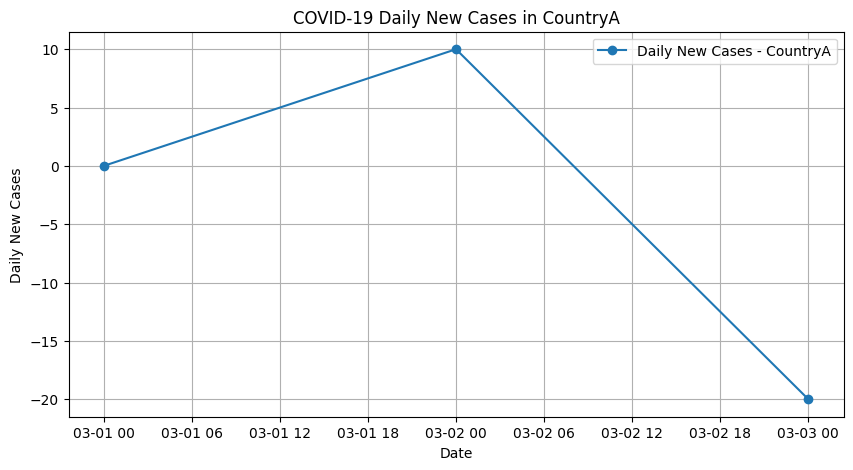

In [51]:
# Sort values by location and date
df.sort_values(by=['location', 'date'], inplace=True)

# Calculate daily new cases per country
df['daily_new_cases'] = df.groupby('location')['total_cases'].diff().fillna(0)

# Plot daily new cases for CountryA
country = 'CountryA'
plt.figure(figsize=(10, 5))
plt.plot(df[df['location'] == country]['date'],
         df[df['location'] == country]['daily_new_cases'],
         marker='o', label=f'Daily New Cases - {country}')

plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title(f'COVID-19 Daily New Cases in {country}')
plt.grid(True)
plt.legend()
plt.show()


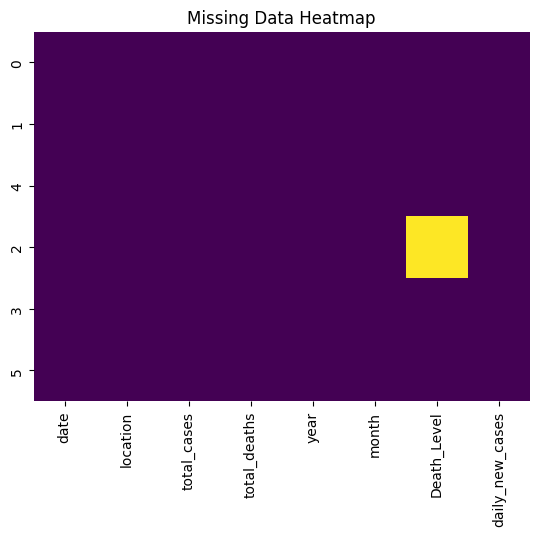

In [52]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()
